### Teesside University MSc Data Science
Machine Learning ICA

----------------------------------------------------------------------------------------------------------------------------

## INTRODUCTION

Machine Learning Application for Bank Customer Churn Prediction 

The dataset used in this project was gotten from https://www.kaggle.com/code/kmalit/bank-customer-churn-prediction/data

##### The aims of this work are:

1. Identify which factors contribute to customer churn using visualization packages.

3. Build a prediction model that will Classify if a customer is going to churn or not.
  

### Importing Required Libraries

In [451]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures

from sklearn.ensemble import ExtraTreesClassifier 

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve

from sklearn.metrics import classification_report,accuracy_score

# Exploratory Data Analysis¶

#### Reading the data from the .csv dataset using pandas library

In [452]:
dataFrame=pd.read_csv("Churn_Modelling.csv")
dataFrame.head(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


#### Basic insight from the dataset

In [453]:
# getting the dimension of the dataFrame
dataFrame.shape

(10000, 14)

The data frame has 10,000 rows with 14 columns. 

In [454]:
dataFrame.dtypes # checking data type of the culumns

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [455]:
# checking for missing values from each column 
dataFrame.isnull().sum() 

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [456]:
# unique value count of each column
dataFrame.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

We will be dropping the columns that are irrelevant
 and will not be contributing to the model development
 ##### the following columns will be dropped
 - RowNumber
 - CustomerId
 - Surname
 

In [457]:

dataFrame = dataFrame.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)
# First row display of whats left
dataFrame.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.0,1,1,1,101348.88,1


In [458]:
# Re-checking for unique count of new columns
dataFrame.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

## Visualization

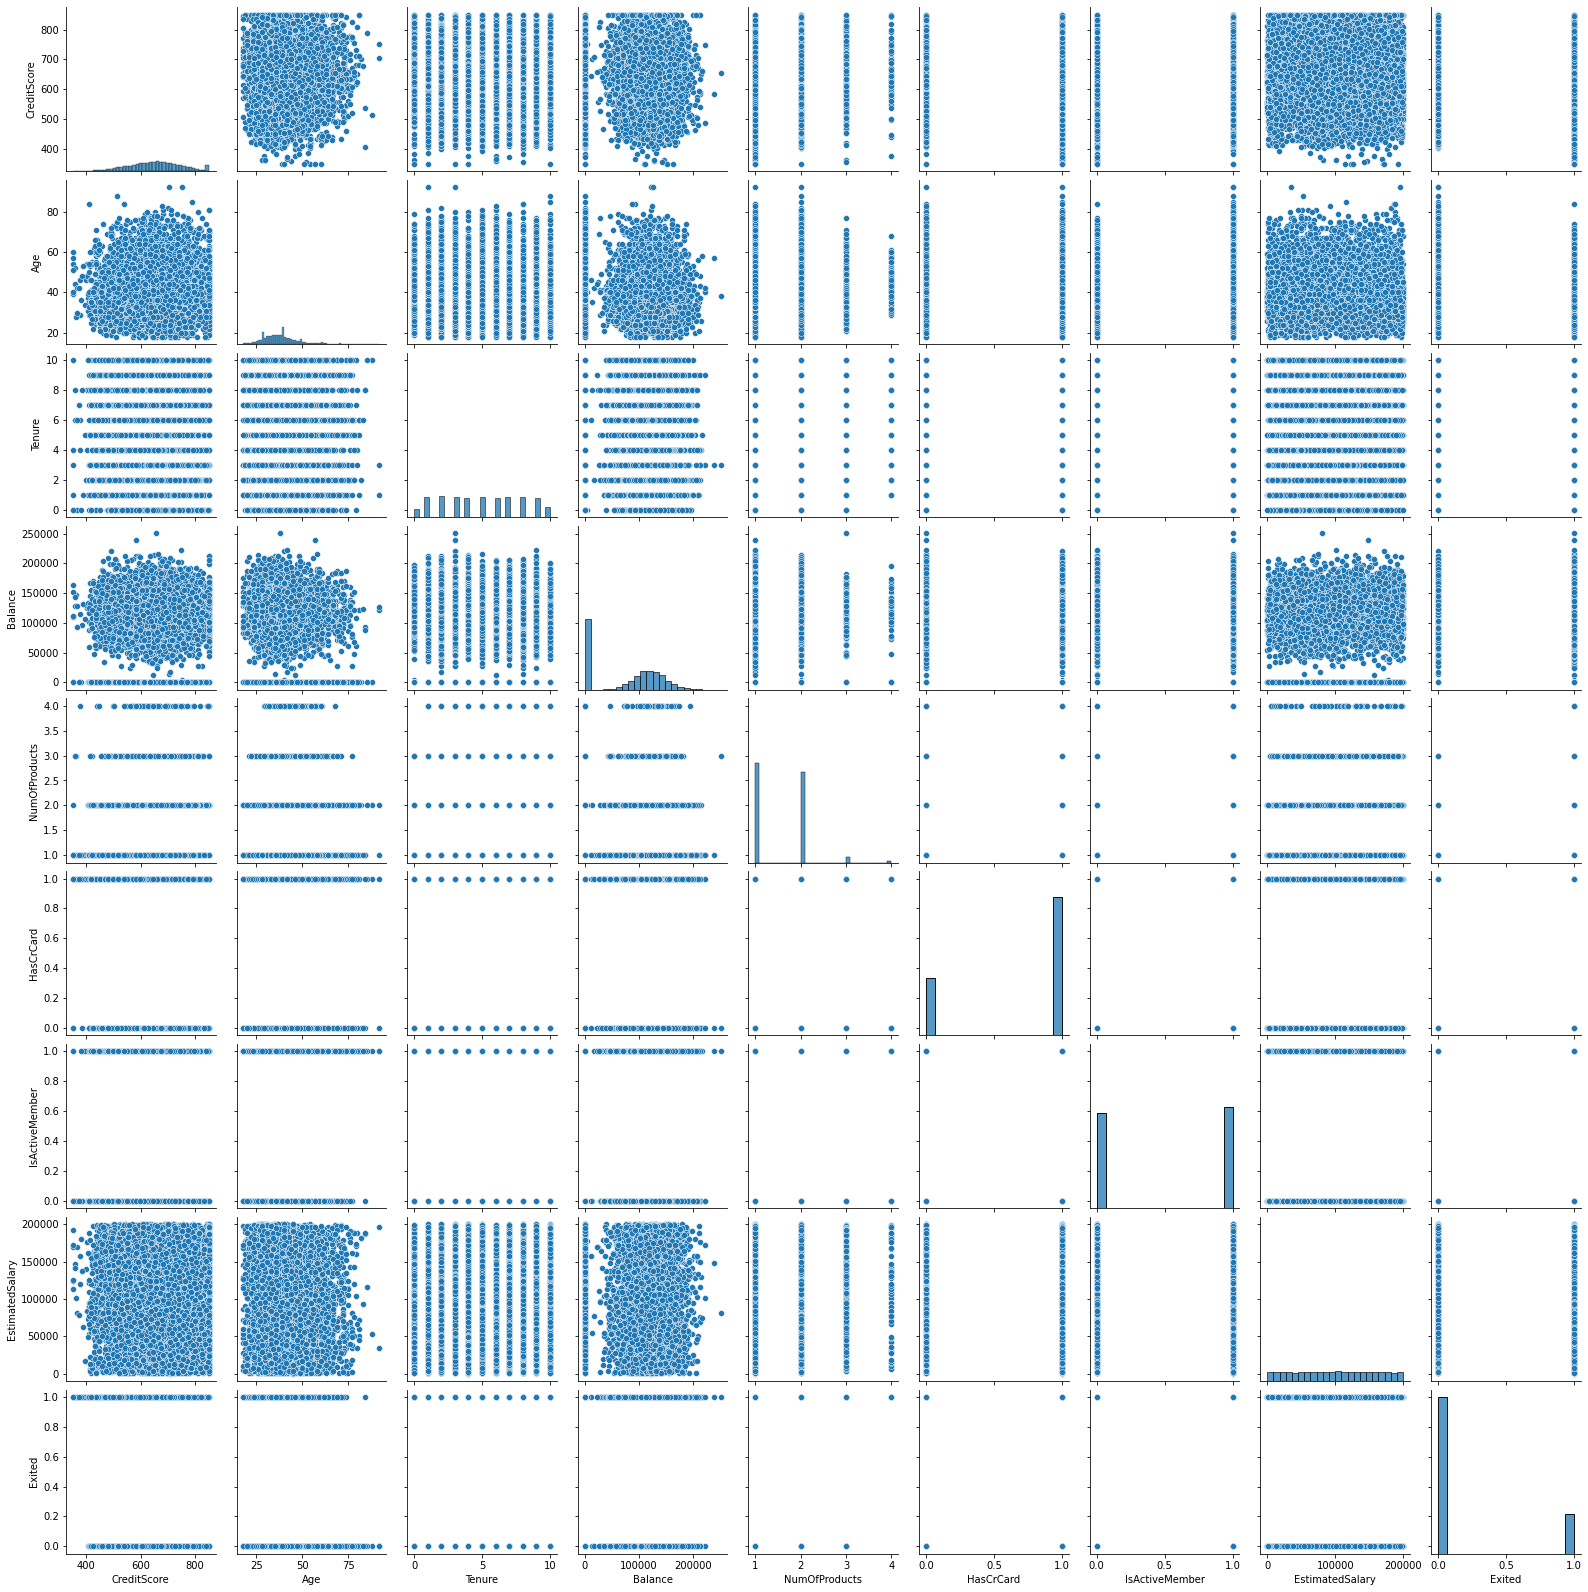

In [459]:
sns.pairplot(dataFrame)

Heat map showing Correlation

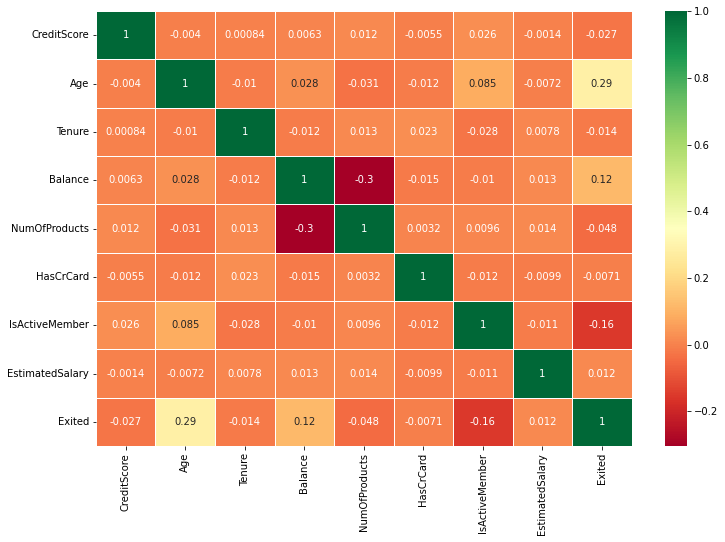

In [460]:
sns.heatmap(dataFrame.corr(),
annot=True,cmap='RdYlGn',linewidths=0.5) 
#data.corr()-->correlation 
matrixfig=plt.gcf()
matrixfig.set_size_inches(12,8)

plt.show()



#### Checking the percentage of churn and retain customer in the dataset

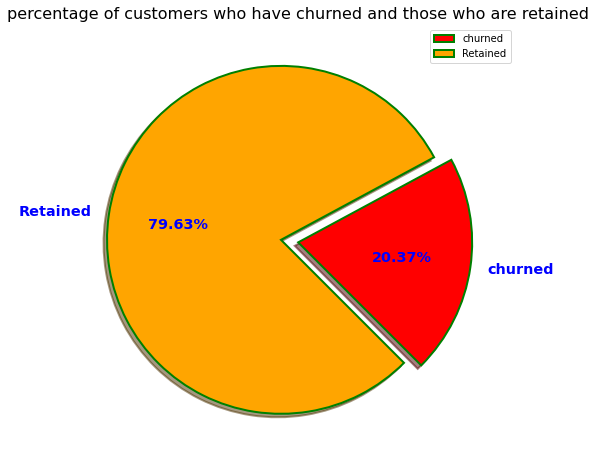

In [461]:
sizes = [dataFrame.Exited[dataFrame['Exited']==1].count(), 
         dataFrame.Exited[dataFrame['Exited']==0].count()
        ]
colors=['chocolate','darksalmon']
explode = (0, 0.1)
wp = { 'linewidth' : 2, 'edgecolor' : "green" }

plt.figure(figsize = (8, 8))
plt.pie(sizes, labels = ['churned', 'Retained'], autopct = '%.2f%%',
        explode=explode,
        colors=['red','orange'],
        shadow=True,
        startangle= -45,
        wedgeprops = wp,
        textprops = {'size' : 'x-large','fontweight' : 'bold', 'color' : 'b',}
       )

plt.legend()
plt.title("percentage of customers who have churned and those who are retained", fontsize = 16)
plt.show()

 *From the pie chart above, 20.37% of customers actually churn and 79.63% are retained*
 *Our focus will be on predicting on a higher Accuracy this percentage of customers will will churn*

### Visualizing categorical variables' impact on the target variable

<AxesSubplot:xlabel='count', ylabel='Geography'>

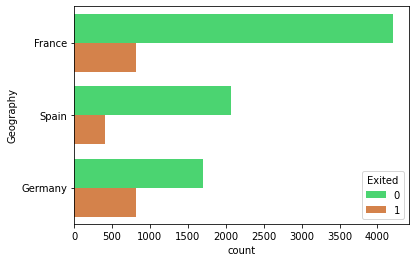

In [462]:
#plotting Geography variable on exited

sns.countplot(y='Geography', hue = 'Exited',
              data = dataFrame, 
              palette=['#34eb67',"#eb7d34"]
             )

Although the majority of consumers are from France, the number of churned customers cannot be determined solely on their region.

<AxesSubplot:xlabel='count', ylabel='IsActiveMember'>

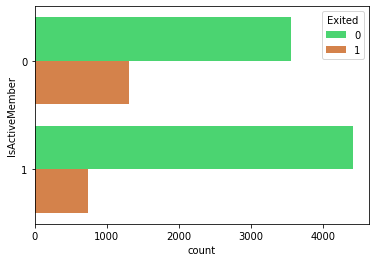

In [463]:
#plot IsActiveMember variable on exited
sns.countplot(y='IsActiveMember', 
              hue = 'Exited',data = dataFrame,  
              palette=['#34eb67',"#eb7d34"]
             )

The Active Members have lower churn while the Inactive Members have a greater churn. 

There is a reason for consern as the number of Inactive Members is very large. the bank needs to look into it. 

<AxesSubplot:xlabel='count', ylabel='HasCrCard'>

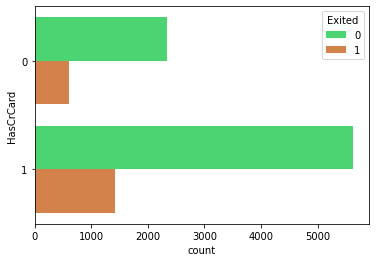

In [464]:
#plot HasCrCard variable on exited
sns.countplot(y='HasCrCard', 
              hue = 'Exited',data = dataFrame,  
              palette=['#34eb67',"#eb7d34"]
             )


The majority of churned consumers are ones that uses credit cards.

<AxesSubplot:xlabel='count', ylabel='Gender'>

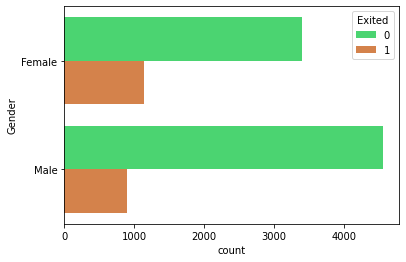

In [465]:
#plot Gender variable on exited
sns.countplot(y='Gender', hue = 'Exited',
              data = dataFrame,  
              palette=['#34eb67',"#eb7d34"]
             )

The number of female clients who are churning outnumbers the number of male consumers.

 ### checking the effect of continuous variable on target variable

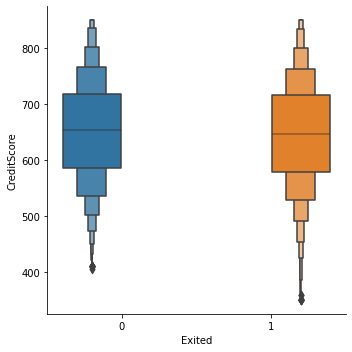

In [466]:
#plot CreditScore variable on exited
sns.catplot(y='CreditScore',x = 'Exited', hue = 'Exited',kind="boxen",data = dataFrame)



There is no discernible variation  in the credit score distribution between retained and churned customers.


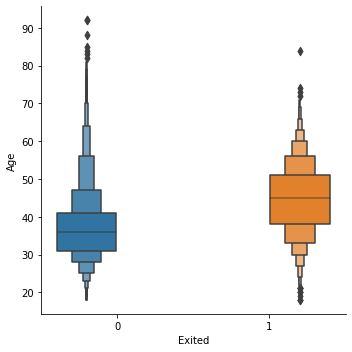

In [467]:
#plot Age variable on exited
sns.catplot(y='Age',x = 'Exited', hue = 'Exited',kind="boxen",data = dataFrame)

The older customers are churning more than the younger customers

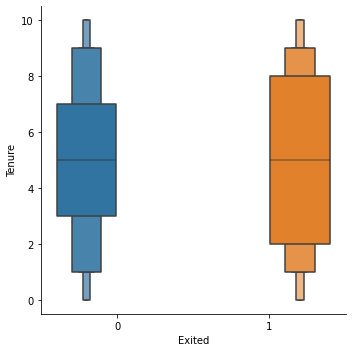

In [468]:
#plot Tenure variable on exited
sns.catplot(y='Tenure',x = 'Exited',kind="boxen", hue = 'Exited',data = dataFrame)

The customers on either extreme end are more likely to churn compared to those that are of average tenure.

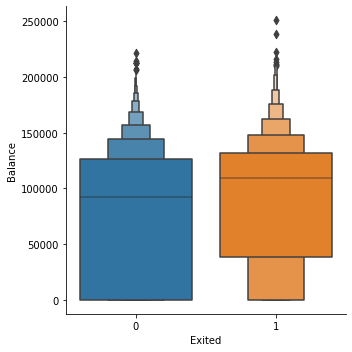

In [469]:
#plot Balance variable on exited
sns.catplot(y='Balance',x = 'Exited', kind = 'boxen',data = dataFrame)

Customers with high balance are chuning. 

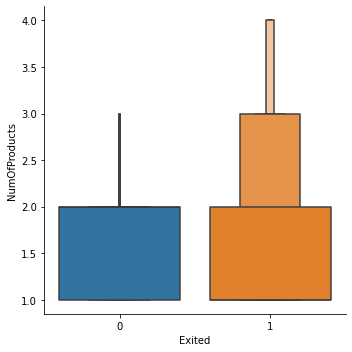

In [470]:
# plot NumOfProducts variable on exited
sns.catplot(y='NumOfProducts',x = 'Exited', kind = 'boxen',data = dataFrame)


Customers with 3 products are churning.

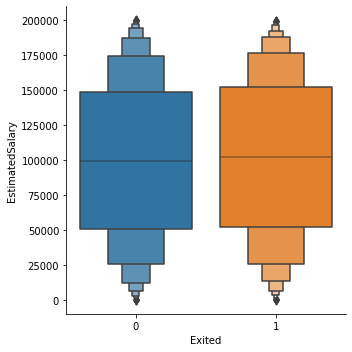

In [471]:
#plot EstimatedSalary variable on exited
sns.catplot(y='EstimatedSalary',x = 'Exited', kind = 'boxen',data = dataFrame)

 salary has no significant effect on target variable.

### Feature engineering  


Divide the data into two sets: training and testing.

In [472]:
# Split Train, test data
df_train = dataFrame.sample(frac=0.8,random_state=200)
df_test = dataFrame.drop(df_train.index)
print("Train Dataset:",df_train.shape)
print("Test Dataset:",df_test.shape)

Train Dataset: (8000, 11)
Test Dataset: (2000, 11)


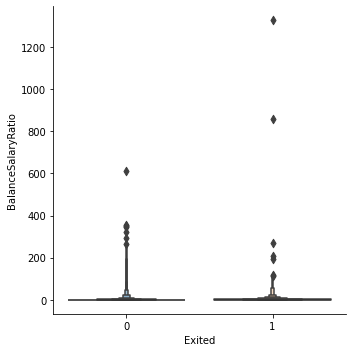

In [473]:
import matplotlib.pyplot as plt
df_train['BalanceSalaryRatio'] = df_train.Balance/df_train.EstimatedSalary
sns.catplot(y='BalanceSalaryRatio',x = 'Exited', kind = 'boxen',data = df_train)




Customer departure is unaffected by salary ratio.

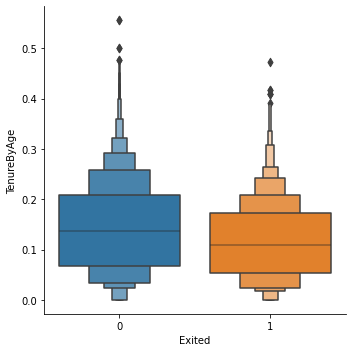

In [474]:
# Given that tenure is a 'function' of age, we create a new column aiming to standardize tenure over age:
df_train['TenureByAge'] = df_train.Tenure/(df_train.Age)
sns.catplot(y='TenureByAge',x = 'Exited', kind = 'boxen',data = df_train)
#plt.ylim(-1, 5)
plt.show()

Customer with low tenure are churning

In [475]:
# we create a column to capture credit score given age to take into account credit behaviour
df_train['CreditScoreGivenAge'] = df_train.CreditScore/(df_train.Age)

In [476]:
# Cheking the dataframe
df_train.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
8159,461,Spain,Female,25,6,0.00,2,1,1,15306.29,0,0.00000,0.240000,18.440000
6332,619,France,Female,35,4,90413.12,1,1,1,20555.21,0,4.39855,0.114286,17.685714


## Data preparation¶

In [477]:
# Re-arranging the columns by data type
continuous_cols = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary', 'BalanceSalaryRatio',
                   'TenureByAge','CreditScoreGivenAge']
cate_cols = ['HasCrCard', 'IsActiveMember','Geography', 'Gender']
df_train = df_train[['Exited'] + continuous_cols + cate_cols]
df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
8159,0,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,Spain,Female
6332,0,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,France,Female
8895,0,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,0,France,Female
5351,0,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,Germany,Male
4314,0,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,0,1,France,Male


In [478]:
#For the one hot variables, we convert 0 to -1 
df_train.loc[df_train.HasCrCard == 0, 'HasCrCard'] = -1
df_train.loc[df_train.IsActiveMember == 0, 'IsActiveMember'] = -1
df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
8159,0,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,Spain,Female
6332,0,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,France,Female
8895,0,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,-1,France,Female
5351,0,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,Germany,Male
4314,0,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,-1,1,France,Male


In [479]:
# One hot encode the categorical variables -1
lst = ['Geography', 'Gender']
remove = list()
for x in lst:
    if (df_train[x].dtype == np.str or df_train[x].dtype == np.object):
        for y in df_train[x].unique():
            df_train[x+'_'+y] = np.where(df_train[x] == y,1,-1)
        remove.append(x)
df_train = df_train.drop(remove, axis=1)
df_train.head()

C:\Users\HP\Desktop\pyprog\data_sc_env\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
C:\Users\HP\Desktop\pyprog\data_sc_env\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_Spain,Geography_France,Geography_Germany,Gender_Female,Gender_Male
8159,0,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,1,-1,-1,1,-1
6332,0,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,-1,1,-1,1,-1
8895,0,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,-1,-1,1,-1,1,-1
5351,0,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,-1,-1,1,-1,1
4314,0,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,-1,1,-1,1,-1,-1,1


#### Data normalization

In [480]:
# create a minimum and Maximum scale for the continuous variables
minVec = df_train[continuous_cols].min().copy()
maxVec = df_train[continuous_cols].max().copy()
df_train[continuous_cols] = (df_train[continuous_cols]-minVec)/(maxVec-minVec)
df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_Spain,Geography_France,Geography_Germany,Gender_Female,Gender_Male
8159,0,0.222,0.094595,0.6,0.000000,0.333333,0.076118,0.000000,0.432000,0.323157,1,1,1,-1,-1,1,-1
6332,0,0.538,0.229730,0.4,0.360358,0.000000,0.102376,0.003317,0.205714,0.305211,1,1,-1,1,-1,1,-1
8895,0,0.698,0.297297,0.8,0.486406,0.000000,0.510225,0.000901,0.360000,0.300198,1,-1,-1,1,-1,1,-1
5351,0,0.416,0.310811,0.2,0.495130,0.000000,0.555744,0.000843,0.087805,0.208238,1,1,-1,-1,1,-1,1
4314,0,0.576,0.216216,0.5,0.532094,0.000000,0.778145,0.000647,0.264706,0.330882,-1,1,-1,1,-1,-1,1


#### Data preparation pipeline for test dataset

In [481]:
def DfPrepPipeline(df_predict,df_train_Cols,minVec,maxVec):
    # this section adds new features
    df_predict['BalanceSalaryRatio'] = df_predict.Balance/df_predict.EstimatedSalary
    df_predict['TenureByAge'] = df_predict.Tenure/(df_predict.Age - 18)
    df_predict['CreditScoreGivenAge'] = df_predict.CreditScore/(df_predict.Age - 18)
    
    # Reordering of the columns
    cont_cols = ['CreditScore','Age','Tenure','Balance',
                 'NumOfProducts','EstimatedSalary','BalanceSalaryRatio',
                 'TenureByAge','CreditScoreGivenAge'
                ]
    cat_cols = ['HasCrCard','IsActiveMember',"Geography", "Gender"] 
    df_predict = df_predict[['Exited'] + cont_cols + cat_cols]
    
    # Changing the '0's in categorical variables to '-1's
    df_predict.loc[df_predict.HasCrCard == 0, 'HasCrCard'] = -1
    df_predict.loc[df_predict.IsActiveMember == 0, 'IsActiveMember'] = -1
    
    # performing one-hot-encoding to th categorical variables
    lst = ["Geography", "Gender"]
    remove = list()
    for x in lst:
        for y in df_predict[x].unique():
            df_predict[x+'_'+y] = np.where(df_predict[x] == y,1,-1)
        remove.append(x)
    df_predict = df_predict.drop(remove, axis=1)
    
    # making sure all one-hot-encoded variables in the train data appears in the subsequent data
    L = list(set(df_train_Cols) - set(df_predict.columns))
    for l in L:
        df_predict[str(l)] = -1        
        
    # MinMax scaling coontinuous variables based on min and max from the train data
    df_predict[cont_cols] = (df_predict[cont_cols]-minVec)/(maxVec-minVec)
    # Ensure that The variables are ordered in the same way as was ordered in the train set
    df_predict = df_predict[df_train_Cols]
    return df_predict

##  Model Fitting

### models

I will be working with the following models

- Logistic regression 
- Random Forest
- Ensemble models(XGboost)
- KNN


In [482]:
# Make the data transformation for test data
df_test = DfPrepPipeline(df_test,df_train.columns,minVec,maxVec)
df_test = df_test.mask(np.isinf(df_test))
df_test = df_test.dropna()
df_test.shape

(1996, 17)

### Splitting train and test dataset into x and y

In [483]:
#Splitting train dataset into x and y
x_train=df_train.loc[:, df_train.columns != 'Exited']
y_train=df_train.Exited
#Splitting test dataset into x and y
x_test=df_test.loc[:, df_test.columns != 'Exited']
y_test=df_test.Exited

### Fine tuning to get right value of k using test dataset

In [484]:
# try K=1 through K=20 and record testing accuracy
k_range = range(1, 20)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)
    y_pred = knn.predict(x_test)
    scores.append(accuracy_score(df_test.Exited, y_pred))

print(scores)

[0.7905811623246493, 0.814629258517034, 0.8166332665330661, 0.8151302605210421, 0.8181362725450901, 0.8176352705410822, 0.8221442885771543, 0.8186372745490982, 0.8221442885771543, 0.8176352705410822, 0.8191382765531062, 0.8181362725450901, 0.8176352705410822, 0.8171342685370742, 0.8186372745490982, 0.814128256513026, 0.8151302605210421, 0.8156312625250501, 0.8161322645290581]


Text(0, 0.5, 'Testing Accuracy')

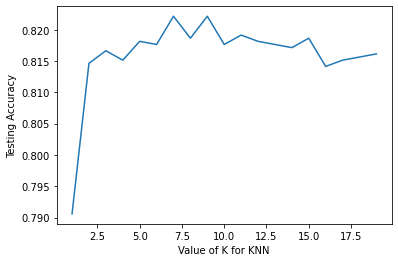

In [485]:
# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

From the above chart, the K value with the highest value of accuracy is 7

## KNeighborsClassifier

In [486]:
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

##### KNN model Training Results

In [502]:
train_preds = knn_model.predict(x_train)
print(classification_report(y_train,train_preds))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      6353
           1       0.77      0.41      0.53      1647

    accuracy                           0.85      8000
   macro avg       0.82      0.69      0.72      8000
weighted avg       0.84      0.85      0.84      8000



#### KNN model Test Results

In [504]:
test_preds_knn = knn_model.predict(x_test)
print(classification_report(y_test,test_preds))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1607
           1       0.70      0.15      0.25       389

    accuracy                           0.82      1996
   macro avg       0.76      0.57      0.57      1996
weighted avg       0.80      0.82      0.77      1996



##### KNN test confusion matrix

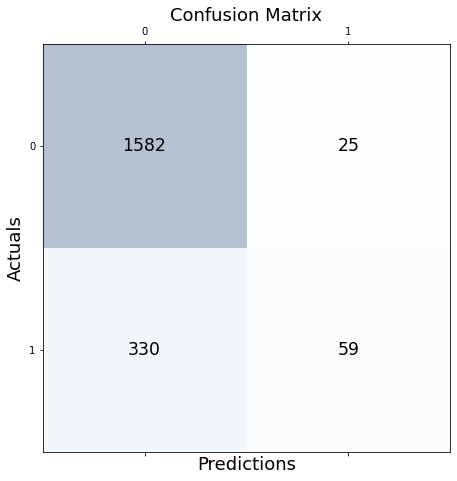

In [505]:
y_pred_hp_rf = knn_model.predict(x_test)
cf_matrix = confusion_matrix(y_test,y_pred_hp_rf)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cf_matrix.shape[0]):
    for j in range(cf_matrix.shape[1]):
        ax.text(x=j, y=i,s=cf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### logistic regression with pol 2 kernel

In [487]:
# Fit logistic regression with pol 2 kernel
poly2 = PolynomialFeatures(degree=2)
df_train_pol2 = poly2.fit_transform(x_train)
log_pol2 = LogisticRegression(solver='liblinear')
log_pol2.fit(df_train_pol2,y_train)


LogisticRegression(solver='liblinear')

##### Logistic regression model Training Results

In [506]:
print(classification_report(y_train,  log_pol2.predict(df_train_pol2)))

              precision    recall  f1-score   support

           0       0.86      0.98      0.91      6353
           1       0.80      0.38      0.52      1647

    accuracy                           0.85      8000
   macro avg       0.83      0.68      0.72      8000
weighted avg       0.85      0.85      0.83      8000



#### Logistic Regression model Test Results

In [507]:
poly2 = PolynomialFeatures(degree=2)
df_test_pol2 = poly2.fit_transform(x_test)

pol2_prob=log_pol2.predict(df_test_pol2)
print(classification_report(y_test,  log_pol2.predict(df_test_pol2)))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1607
           1       0.42      0.39      0.40       389

    accuracy                           0.78      1996
   macro avg       0.64      0.63      0.63      1996
weighted avg       0.77      0.78      0.77      1996



###  RandomForestClassifier

In [488]:
# Fit Random Forest classifier 
RF = RandomForestClassifier(n_estimators=1000,min_samples_leaf=4, min_samples_split=2,max_features=16,max_depth=None,bootstrap=True)
RF.fit(x_train,y_train)

RandomForestClassifier(max_features=16, min_samples_leaf=4, n_estimators=1000)

##### Random Forest model Training Results

In [509]:
print(classification_report(y_train,  RF.predict(x_train)))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      6353
           1       0.94      0.74      0.83      1647

    accuracy                           0.94      8000
   macro avg       0.94      0.86      0.89      8000
weighted avg       0.94      0.94      0.93      8000



##### Random Forest model Test Results

In [510]:
rf_prob=RF.predict(x_test)

print(classification_report(y_test,  RF.predict(x_test)))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1607
           1       0.71      0.49      0.58       389

    accuracy                           0.86      1996
   macro avg       0.80      0.72      0.75      1996
weighted avg       0.85      0.86      0.85      1996



#### Random  Forest test Confusion matrix

[[1530   77]
 [ 199  190]]


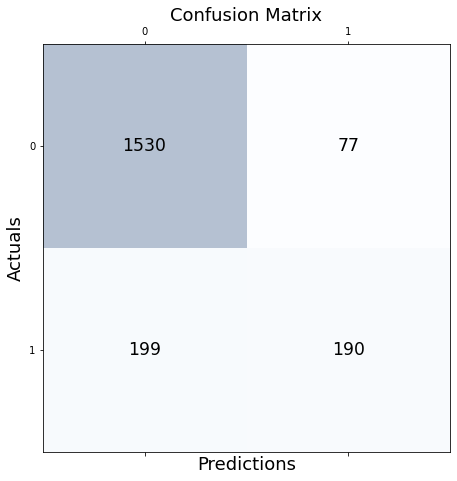

In [511]:
y_pred_hp_rf = RF.predict(x_test)
cf_matrix = confusion_matrix(y_test,y_pred_hp_rf)

print(cf_matrix)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cf_matrix.shape[0]):
    for j in range(cf_matrix.shape[1]):
        ax.text(x=j, y=i,s=cf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

#### XGBClassifier

In [489]:
# Extreme Gradient Boost Classifier
XGB = XGBClassifier(gamma=0.01, learning_rate=0.08555,eval_metric="logloss")
XGB.fit(x_train,y_train)

C:\Users\HP\Desktop\pyprog\data_sc_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0.01, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.08555, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

##### XGboost model Training Results

In [493]:
print(classification_report(y_train,  XGB.predict(x_train)))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      6353
           1       0.88      0.60      0.71      1647

    accuracy                           0.90      8000
   macro avg       0.89      0.79      0.83      8000
weighted avg       0.90      0.90      0.89      8000



From the classification reports of models above, the best model that gives a decent balance of the recall and precision is the random forest where According to the fit on the training set, with a precision score on 1's of 0.94, out of all customers that the model thinks would churn, 94 percent do indeed churn, and with a recall score on 1's of 0.74, the model is able to highlight 74 percent of all those that churned.

### XGboost model Test Results

In [499]:
xgb_prob= XGB.predict(x_test)
print(classification_report(y_test,  XGB.predict(x_test)))

              precision    recall  f1-score   support

           0       0.89      0.97      0.92      1607
           1       0.77      0.49      0.60       389

    accuracy                           0.87      1996
   macro avg       0.83      0.73      0.76      1996
weighted avg       0.86      0.87      0.86      1996



The XGBoost ensembles method, with an overall accuracy of 87 percent and a precision score of 77 percent on 1's, and a recall score of 49 percent on 1's, is the best model that gives the highest overall accuracy with a decent balance of recall and precision, according to the classification reports of models above.

#### XGboost Test Confusion  matrix

[[1552   55]
 [ 200  189]]


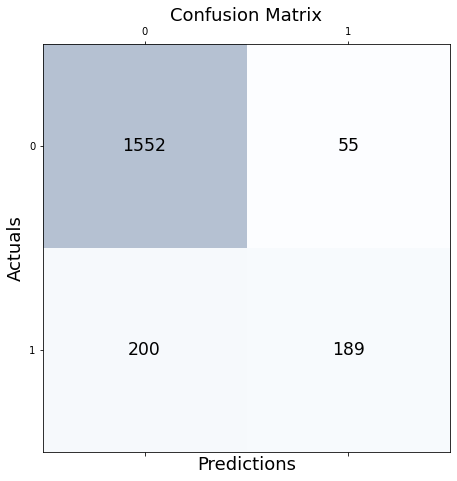

In [500]:
y_pred_hp_rf = XGB.predict(x_test)
cf_matrix = confusion_matrix(y_test,y_pred_hp_rf)

print(cf_matrix)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cf_matrix.shape[0]):
    for j in range(cf_matrix.shape[1]):
        ax.text(x=j, y=i,s=cf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

#### Creating  an Accuracy Plot of all the models used

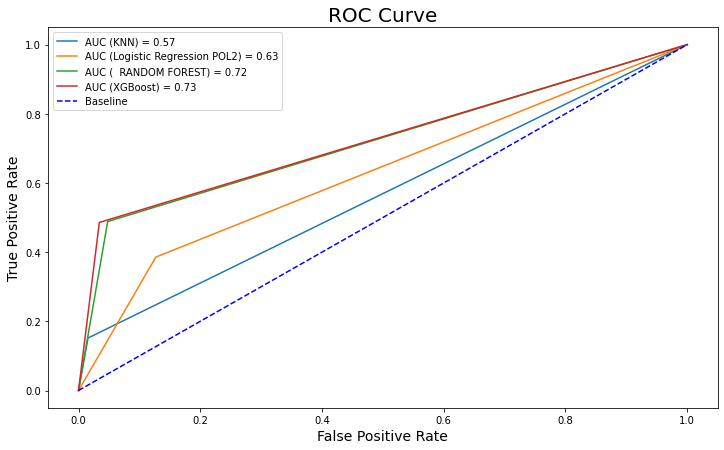

In [501]:
accuracy_lr = roc_auc_score(y_test,test_preds_knn)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test,test_preds_knn)

accuracy_pol = roc_auc_score(y_test,pol2_prob)
fpr_pol, tpr_pol, thresholds_pol = roc_curve(y_test,pol2_prob)

accuracy_rf = roc_auc_score(y_test,rf_prob)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test,rf_prob)

accuracy_xgb = roc_auc_score(y_test,xgb_prob)
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test,xgb_prob)

plt.figure(figsize=(12, 7))
plt.plot(fpr_lr, tpr_lr, label=f'AUC (KNN) = {accuracy_lr:.2f}')
plt.plot(fpr_pol, tpr_pol, label=f'AUC (Logistic Regression POL2) = {accuracy_pol:.2f}')
plt.plot(fpr_rf, tpr_rf, label=f'AUC (  RANDOM FOREST) = {accuracy_rf:.2f}')
plt.plot(fpr_xgb, tpr_xgb, label=f'AUC (XGBoost) = {accuracy_xgb:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();

 ## Conclusion

On the test dataset, the model's f1-score for predicting churned customers is slightly higher. Even while the model is very accurate, it still misses 40% of those who end up churning. However, it is in our best interests to predict which clients are likely to churn so that a plan may be put in place to prevent it. Retraining the model with more data over time, while working with the model to save the 60% percent that may have churned, could enhance the accuracy.
